In [1]:
import pandas as pd
import seaborn as sns

In [77]:
global_data = pd.read_json('data/climate_edu/global_warming.jsonl', lines=True)
global_data.time = global_data.time.astype(str)

In [84]:
global_data[['year','month']] = global_data.time.str.split('.', expand=True)
global_data['month'] = global_data.groupby('year').month.transform(lambda x: range(1, x.count() + 1)).astype(str).str.zfill(2)
global_data['time'] = global_data.year + '.' + global_data.month.astype(str)
global_data = global_data.drop(columns=['year', 'month'])
global_data

,time,station,land
0,1880.01,-0.27,-0.18
1,1880.02,-0.47,-0.24
2,1880.03,-0.32,-0.09
3,1880.04,-0.53,-0.16
4,1880.05,-0.24,-0.10
...,...,...,...
1739,2024.12,1.64,1.27
1740,2025.01,1.74,1.37
1741,2025.02,1.61,1.25
1742,2025.03,1.64,1.36


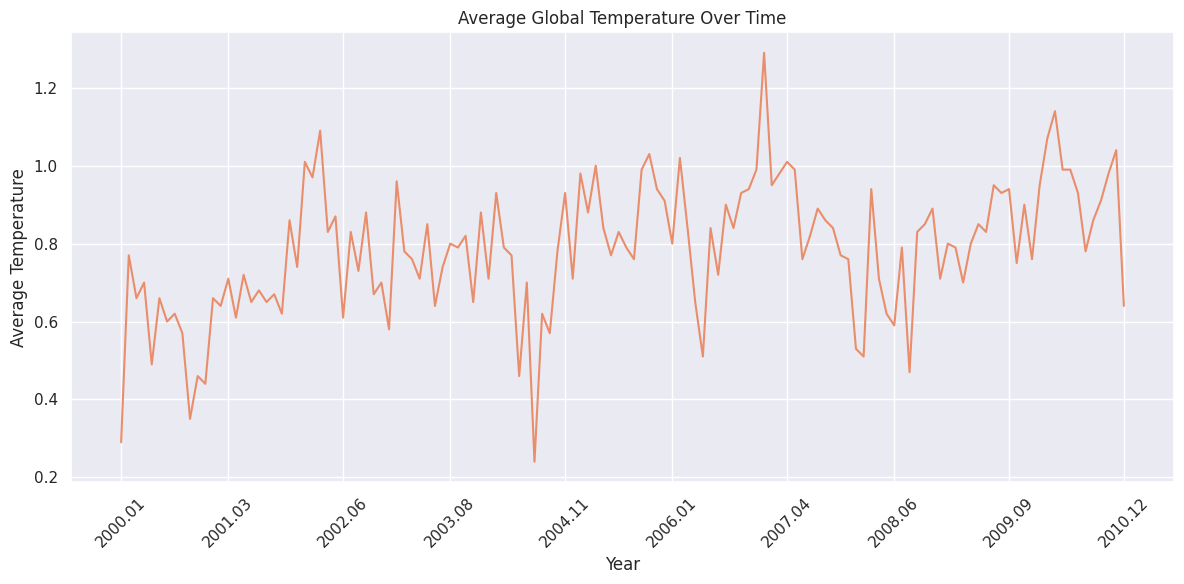

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis objects with specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Create the line plot
sns.lineplot(x='time', y='station', data=filtered_df, ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature')
ax.set_title('Average Global Temperature Over Time')

# Handle x-axis ticks
ticks = ax.get_xticks()
tick_positions = np.linspace(ticks[0], ticks[-1], 10, dtype=int) if len(ticks) > 10 else ticks
ax.set_xticks(tick_positions)
ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

In [3]:
import httpx
import json

In [15]:
co2 = httpx.get('https://global-warming.org/api/co2-api').json()
jsonl = co2['co2']

In [22]:
co2 = pd.read_json('data/climate_edu/co2.jsonl', lines=True)
co2['month'] = co2.month.astype(str).str.zfill(2)
co2['day'] = co2.day.astype(str).str.zfill(2)
co2['time'] = co2.year.astype(str) + '.' + co2.month + '.' + co2.day

In [24]:
with open('data/climate_edu/co2.jsonl', 'w') as f:
    co2.to_json(f, orient='records', lines=True)

In [ ]:
import app.utils as utils

ValueError: Could not interpret value `co2` for `y`. An entry with this name does not appear in `data`.

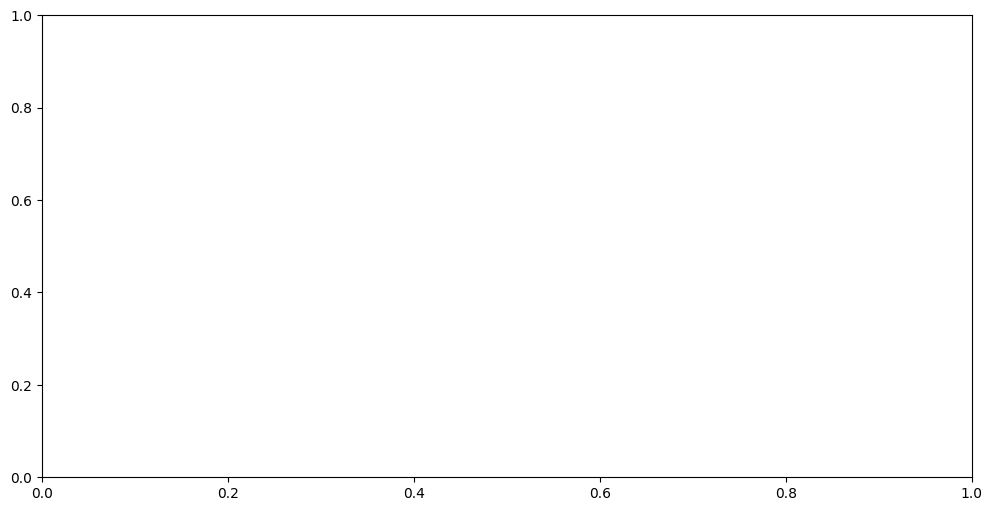

In [29]:
utils.plot_co2('2023.10.01', '2023.10.31')